<a href="https://colab.research.google.com/github/Moaz-Mahmoud-S/Data-analytics-/blob/main/pandas_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Merging all the sales file in one file**

In [ ]:
import pandas as pd
import os

file_path = "/content/sample_data/sales data"
file_list = os.listdir(file_path)


df = []
for i in file_list:
    df.append(pd.read_csv(file_path + "/" + i))


big_df = pd.concat(df, ignore_index=True)

print(big_df.head())



  Order ID                   Product Quantity Ordered Price Each  \
0   150502                    iPhone                1        700   
1   150503     AA Batteries (4-pack)                1       3.84   
2   150504    27in 4K Gaming Monitor                1     389.99   
3   150505  Lightning Charging Cable                1      14.95   
4   150506     AA Batteries (4-pack)                2       3.84   

       Order Date                     Purchase Address  
0  02/18/19 01:35    866 Spruce St, Portland, ME 04101  
1  02/13/19 07:24  18 13th St, San Francisco, CA 94016  
2  02/18/19 09:46   52 6th St, New York City, NY 10001  
3  02/02/19 16:47     129 Cherry St, Atlanta, GA 30301  
4  02/28/19 20:32    548 Lincoln St, Seattle, WA 98101  


**Cleanning the data**

In [ ]:
# from null rows
big_df.dropna(how="all")

# from the "order date" value in the order date
big_df=big_df[big_df['Order Date'].str[0:2]!= 'Or']

**Adding new column**

In [ ]:
import datetime as dt

big_df['Year'] = pd.DatetimeIndex(big_df['Order Date']).year
big_df['Month'] = pd.DatetimeIndex(big_df['Order Date']).month


print(big_df.head())


  Order ID                   Product Quantity Ordered Price Each  \
0   150502                    iPhone                1        700   
1   150503     AA Batteries (4-pack)                1       3.84   
2   150504    27in 4K Gaming Monitor                1     389.99   
3   150505  Lightning Charging Cable                1      14.95   
4   150506     AA Batteries (4-pack)                2       3.84   

       Order Date                     Purchase Address    Year  Month  
0  02/18/19 01:35    866 Spruce St, Portland, ME 04101  2019.0    2.0  
1  02/13/19 07:24  18 13th St, San Francisco, CA 94016  2019.0    2.0  
2  02/18/19 09:46   52 6th St, New York City, NY 10001  2019.0    2.0  
3  02/02/19 16:47     129 Cherry St, Atlanta, GA 30301  2019.0    2.0  
4  02/28/19 20:32    548 Lincoln St, Seattle, WA 98101  2019.0    2.0  


In [ ]:
big_df = big_df.dropna(subset=['Quantity Ordered'])
big_df = big_df.dropna(subset=['Price Each'])

In [ ]:
big_df["profit"] = big_df['Quantity Ordered'].astype(float) * big_df['Price Each'].astype(float)

In [ ]:
big_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,profit
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101",2019.0,2.0,700.00
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016",2019.0,2.0,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001",2019.0,2.0,389.99
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301",2019.0,2.0,14.95
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101",2019.0,2.0,7.68


**Q1: What is the best month for sales ? and how much was earned?**

In [ ]:
result = big_df.groupby("Month").sum()

<ipython-input-113-cb37d03442f5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = big_df.groupby("Month").sum()


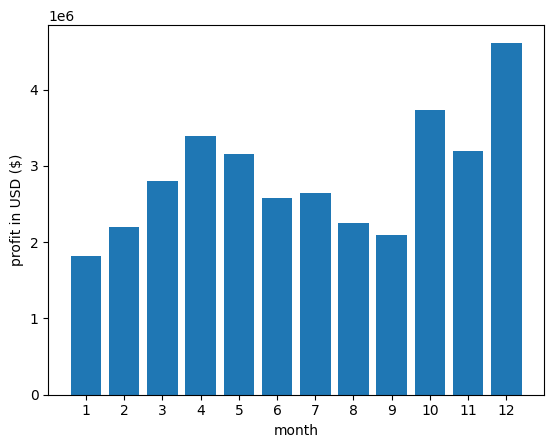

In [ ]:
import matplotlib.pyplot as plt

month=range(1,13)

plt.bar(month,result["profit"])

plt.xticks(month)
plt.xlabel("month")
plt.ylabel("profit in USD ($)")


plt.show()

Q2: what city has the highst sales

In [ ]:
def get_city (address):
  return address.split(',')[1]

def get_state (address):
  return address.split(',')[2].split(" ")[1]

big_df["city"] = big_df["Purchase Address"].apply(lambda x : get_city(x)+" "+get_state(x))


In [ ]:
big_df["city"]

0               Portland ME
1          San Francisco CA
2          New York City NY
3                Atlanta GA
4                Seattle WA
                ...        
186845       Los Angeles CA
186846            Austin TX
186847            Boston MA
186848            Boston MA
186849            Boston MA
Name: city, Length: 185950, dtype: object

In [ ]:
res = big_df.groupby('city').sum()
print(res)

                         Year     Month      profit
city                                               
 Atlanta GA        30044739.0  104794.0  2795498.58
 Austin TX         19998197.0   69829.0  1819581.75
 Boston MA         40246750.0  141112.0  3661642.01
 Dallas TX         29921582.0  104620.0  2767975.40
 Los Angeles CA    59772496.0  208325.0  5452570.80
 New York City NY  50224654.0  175741.0  4664317.43
 Portland ME        4956645.0   17144.0   449758.27
 Portland OR       20210192.0   70621.0  1870732.34
 San Francisco CA  90313920.0  315520.0  8262203.91
 Seattle WA        29743909.0  104941.0  2747755.48


<ipython-input-162-5d8f1ac2a230>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res = big_df.groupby('city').sum()


[' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX', ' Los Angeles CA', ' New York City NY', ' Portland ME', ' Portland OR', ' San Francisco CA', ' Seattle WA']


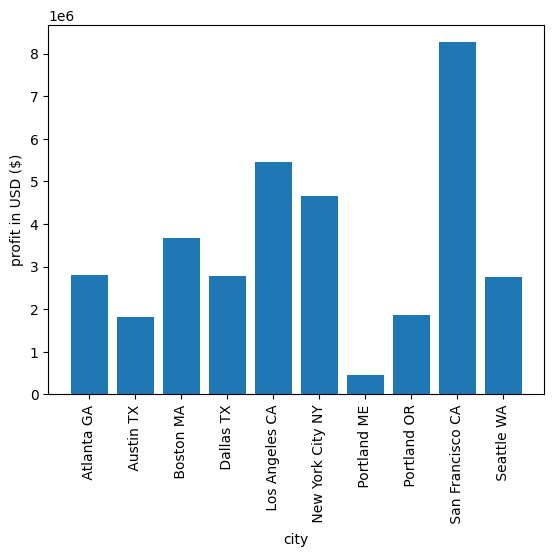

In [ ]:
import matplotlib.pyplot as plt

city = [city for city , df in big_df.groupby('city')]

print(city)

plt.bar(city,res["profit"])

plt.xticks(city,rotation='vertical')
plt.xlabel("city")
plt.ylabel("profit in USD ($)")


plt.show()



Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
import datetime as dt
big_df['Order Date'] =pd.to_datetime(big_df['Order Date'])

In [ ]:
big_df["hour"] = big_df['Order Date'].dt.hour
big_df["minute"] = big_df['Order Date'].dt.minute
big_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,profit,city,time,hour,minute
0,150502,iPhone,1,700,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",2019.0,2.0,700.00,Portland ME,01:35:00,1,35
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",2019.0,2.0,3.84,San Francisco CA,07:24:00,7,24
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",2019.0,2.0,389.99,New York City NY,09:46:00,9,46
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",2019.0,2.0,14.95,Atlanta GA,16:47:00,16,47
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",2019.0,2.0,7.68,Seattle WA,20:32:00,20,32


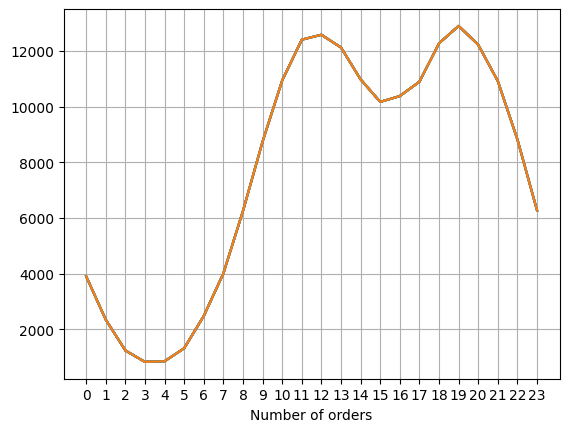

In [ ]:
import matplotlib.pyplot as plt

hour = [hour for hour , df in big_df.groupby('hour')]


plt.plot(hour,big_df.groupby('hour').count())


plt.xticks(hour)
plt.xlabel("Hour")
plt.xlabel("Number of orders")
plt.grid()

plt.show()


**Q4: What products are most often sold together?**

In [ ]:
df = big_df[big_df['Order ID'].duplicated(keep=False)]
df['Grouped'] = big_df.groupby("Order ID")["Product"].transform(lambda x : ','.join(x))

<ipython-input-182-00e6e7a9dd7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = big_df.groupby("Order ID")["Product"].transform(lambda x : ','.join(x))


In [ ]:
df = df[["Order ID","Grouped"]].drop_duplicates()
df

,Order ID,Grouped
16,150518,"Macbook Pro Laptop,iPhone"
82,150582,"iPhone,Lightning Charging Cable"
91,150590,"Apple Airpods Headphones,AAA Batteries (4-pack)"
119,150617,"Google Phone,USB-C Charging Cable"
154,150651,"Google Phone,USB-C Charging Cable"
...,...,...
186667,295487,"Apple Airpods Headphones,Macbook Pro Laptop"
186694,295513,"iPhone,Lightning Charging Cable"
186708,295526,"Apple Airpods Headphones,27in FHD Monitor"
186717,295534,"Google Phone,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
  row_list = row.split(",")
  count.update(Counter(combinations(row_list,2)))

print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


**Q5: What product sold the most? Why do you think it sold the most?**

In [ ]:
big_df['Quantity Ordered'] = big_df['Quantity Ordered'].astype(float)

<ipython-input-231-1ac30d692db9>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


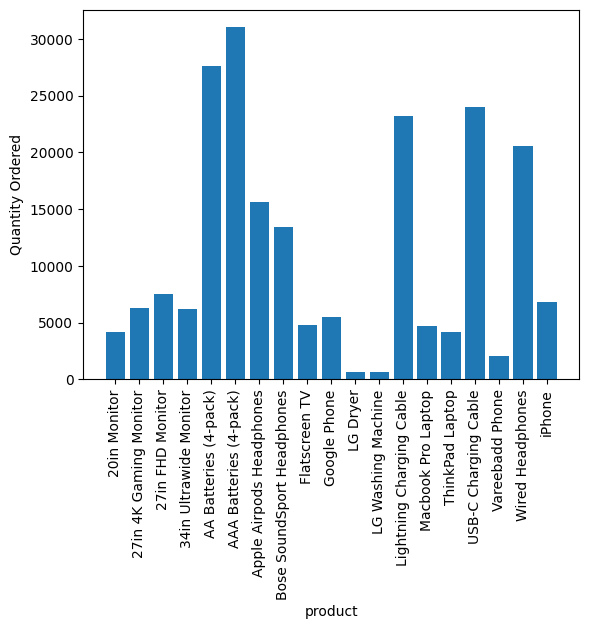

In [ ]:
product_group = big_df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.ylabel("Quantity Ordered")
plt.xlabel("product")
plt.xticks(products,rotation= 'vertical')
plt.show()

<ipython-input-233-687a113f847f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


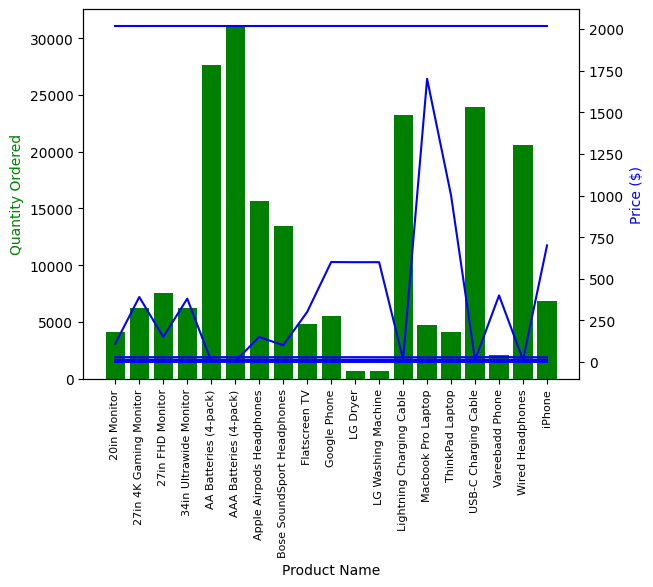

In [ ]:
prices = big_df.groupby(['Product']).mean("Price Each")

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()